<a href="https://colab.research.google.com/github/Kentaro-Kamaishi/test/blob/master/aco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import random

In [70]:
NOA = 10 # ありの数
ILIMIT = 100 # 繰り返し回数　置換する
Q = 3 # フェロモン更新の定数
RHO = 0.8 # 蒸発の定数
STEP = 10 # 道のりのステップ数
EPSILON = 0.15 # 行動のランダム性を決定

In [59]:
def update(cost, pheromone, mstep):
  sum_lm = 0
  pheromone *= RHO
  for m in range(NOA):
    lm = sum([ cost[mstep[m][i]][i] for i in range(STEP)])
    for i in range(STEP):
      pheromone[mstep[m][i]][i] += Q * (1.0/lm)
    sum_lm += lm
  mean_lm = sum_lm/NOA
  print(mean_lm)
  return mean_lm # ありの歩いた平均距離

In [60]:
def walk(cost, pheromone, mstep):
  for m in range(NOA):
    for s in range(STEP):
      if random.random() < EPSILON or abs(pheromone[0][s] - pheromone[1][s]) < 1e-9: # ランダムに行動選択
        mstep[m][s] = random.randint(0,1)
      else:
        if pheromone[0][s] > pheromone[1][s]:
          mstep[m][s] = 0
        else:
          mstep[m][s] = 1
  print('*mstep')
  print(mstep)

In [74]:
cost = np.zeros((2, STEP), dtype=int)
cost[0,:] = 1
cost[1,:] = 5

pheromone = np.zeros((2, STEP))
mstep = np.zeros((NOA, STEP), dtype=int) # mstep[i][j]: ありiがノードjでどちらの分岐方向を選んだか 0:上、1:下

np.set_printoptions(precision=4, suppress=True)
i = 0
distance = []
for _ in range(ILIMIT):
  print(pheromone)
  walk(cost, pheromone, mstep)
  l = update(cost, pheromone, mstep)
  i += 1
  distance.append(l)

print(i)
print(pheromone)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
*mstep
[[0 0 0 0 1 1 0 1 0 0]
 [1 1 0 1 1 0 1 0 1 0]
 [0 1 1 1 0 1 0 0 0 1]
 [0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 1 0 0 1]
 [1 0 0 0 1 1 0 1 1 0]
 [0 1 1 0 0 1 1 1 1 0]
 [1 1 0 0 1 1 1 0 1 0]
 [0 0 0 1 0 0 0 1 0 1]
 [0 1 0 0 1 1 1 1 1 1]]
28.4
[[0.8429 0.6758 0.7645 0.7948 0.6276 0.3913 0.4727 0.5795 0.6758 0.6677]
 [0.2765 0.4437 0.3549 0.3246 0.4918 0.7281 0.6467 0.5399 0.4437 0.4517]]
*mstep
[[0 0 0 0 0 1 1 0 0 0]
 [1 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 1 0 1 0]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [1 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]]
18.8
[[2.025  2.164  2.235  2.2592 2.1255 0.313  0.5925 2.087  2.0276 2.1576]
 [0.4939 0.3549 0.2839 0.2597 0.3934 2.2059 1.9264 0.4319 0.4913 0.3613]]
*mstep
[[0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 1 0 0 1]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 1 1]
 [0 0 0 

In [56]:
import matplotlib.pyplot as plt

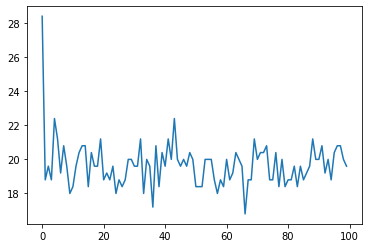

In [75]:
plt.plot(distance)